In [ ]:
# Importing the libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

# READING THE DATASET

In [ ]:
#reading the dataset


data= pd.read_csv('Iris.csv',index_col = 0)


data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


# MISSING VALUES

<Axes: ylabel='Id'>

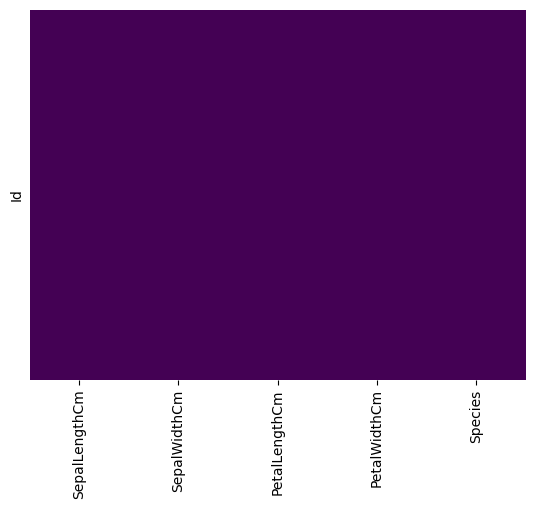

In [ ]:
#Cleaning the data, basically we are checking for any Missing value(NAN) and their percentage of missing.

#Clearly here no data is missing (observed)


sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [ ]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# visualization

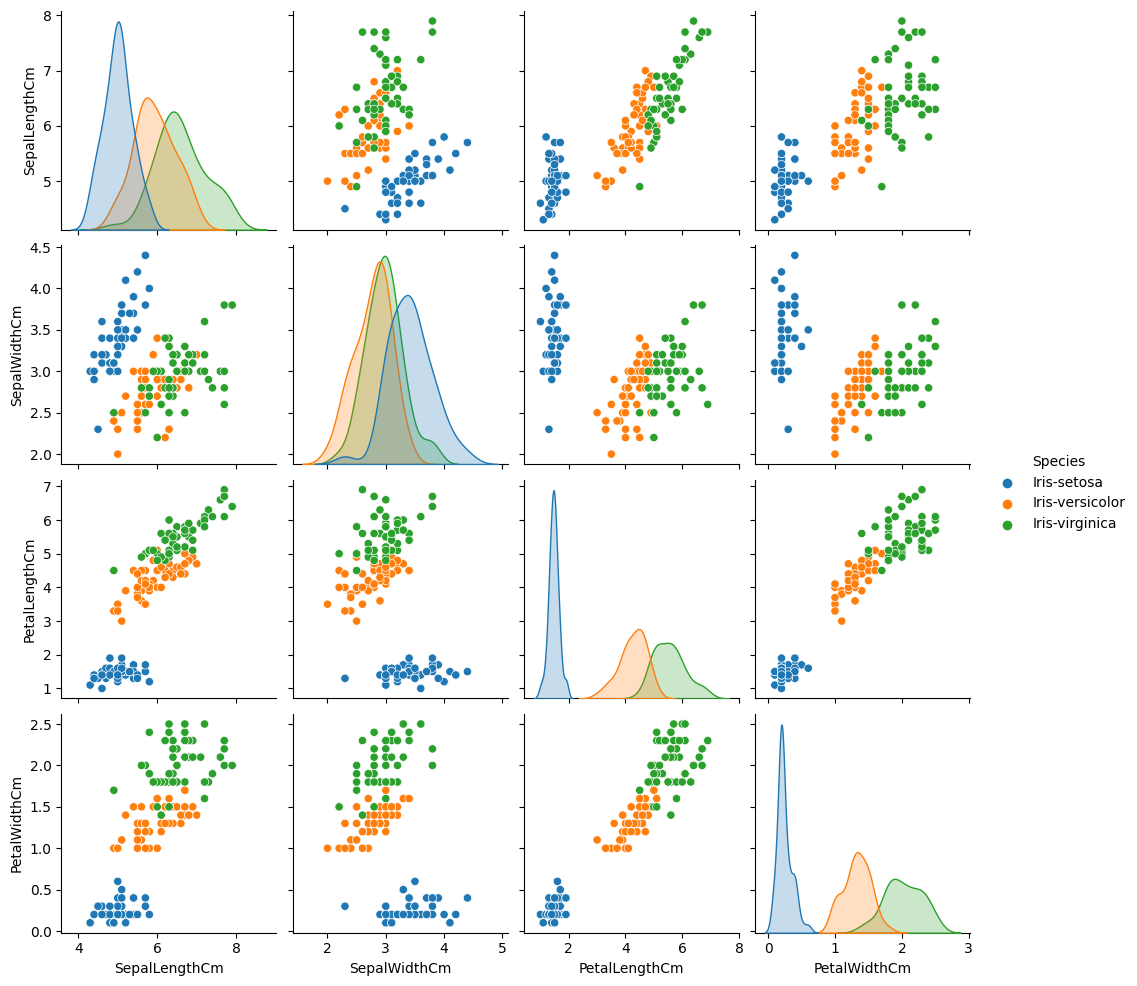

In [ ]:
sns.pairplot(data, hue = 'Species')

We can easily observe that "iris-setosa" makes a distinctive cluster in every parameter, while the other two species are overlapping a bit on each other

<Axes: >

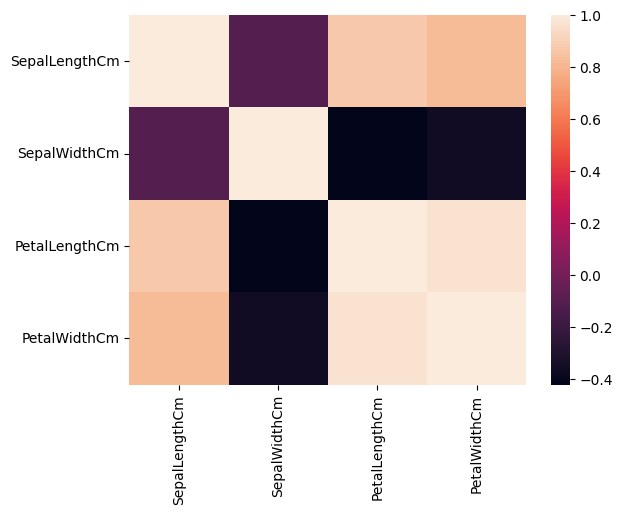

In [ ]:
# correlation matrix

sns.heatmap(data.corr())

#### Petal length is highly related to petal width.¶
#### Sepal length is not as related to sepal width.

# Data preprocessing

In [ ]:
target = data['Species']
data1 = data.copy()
data1 = data1.drop('Species', axis =1)
data1.shape

(150, 4)

In [ ]:
import sklearn.metrics as sm

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree


In [ ]:
#  Defining the attributes and labels

X = data.iloc[:, [0, 1, 2, 3]].values #Attributes

le = LabelEncoder()

data['Species'] = le.fit_transform(data['Species'])

y = data['Species'].values  #Labels

print("The shape of the data is: ", data.shape)

The shape of the data is:  (150, 5)


# MODEL TRAINING

In [ ]:
# Splitting the data into 70:30 ratio


X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.3, random_state = 101 )

print("Training data: ", X_train.shape)

print("Testing data: ", X_test.shape)

Training data:  (105, 4)
Testing data:  (45, 4)


In [ ]:
# creating the decision tree algorithm

dtree=DecisionTreeClassifier()

dtree.fit(X_train,y_train)


DecisionTreeClassifier()

# Classification Report and confusion Matrix.

In [ ]:
# Predicting the values of test data

y_pred = dtree.predict(X_test)

print("Classification report: ", classification_report(y_test,y_pred))

Classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      0.95      0.95        20
           2       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [ ]:
#Accuracy is


print("Accuracy is: ",sm.accuracy_score(y_test, y_pred))



Accuracy is:  0.9555555555555556


In [ ]:
#Confusion matrix


cm = confusion_matrix(y_test, y_pred)
cm

array([[13,  0,  0],
       [ 0, 19,  1],
       [ 0,  1, 11]])

# Visualizing the trained model

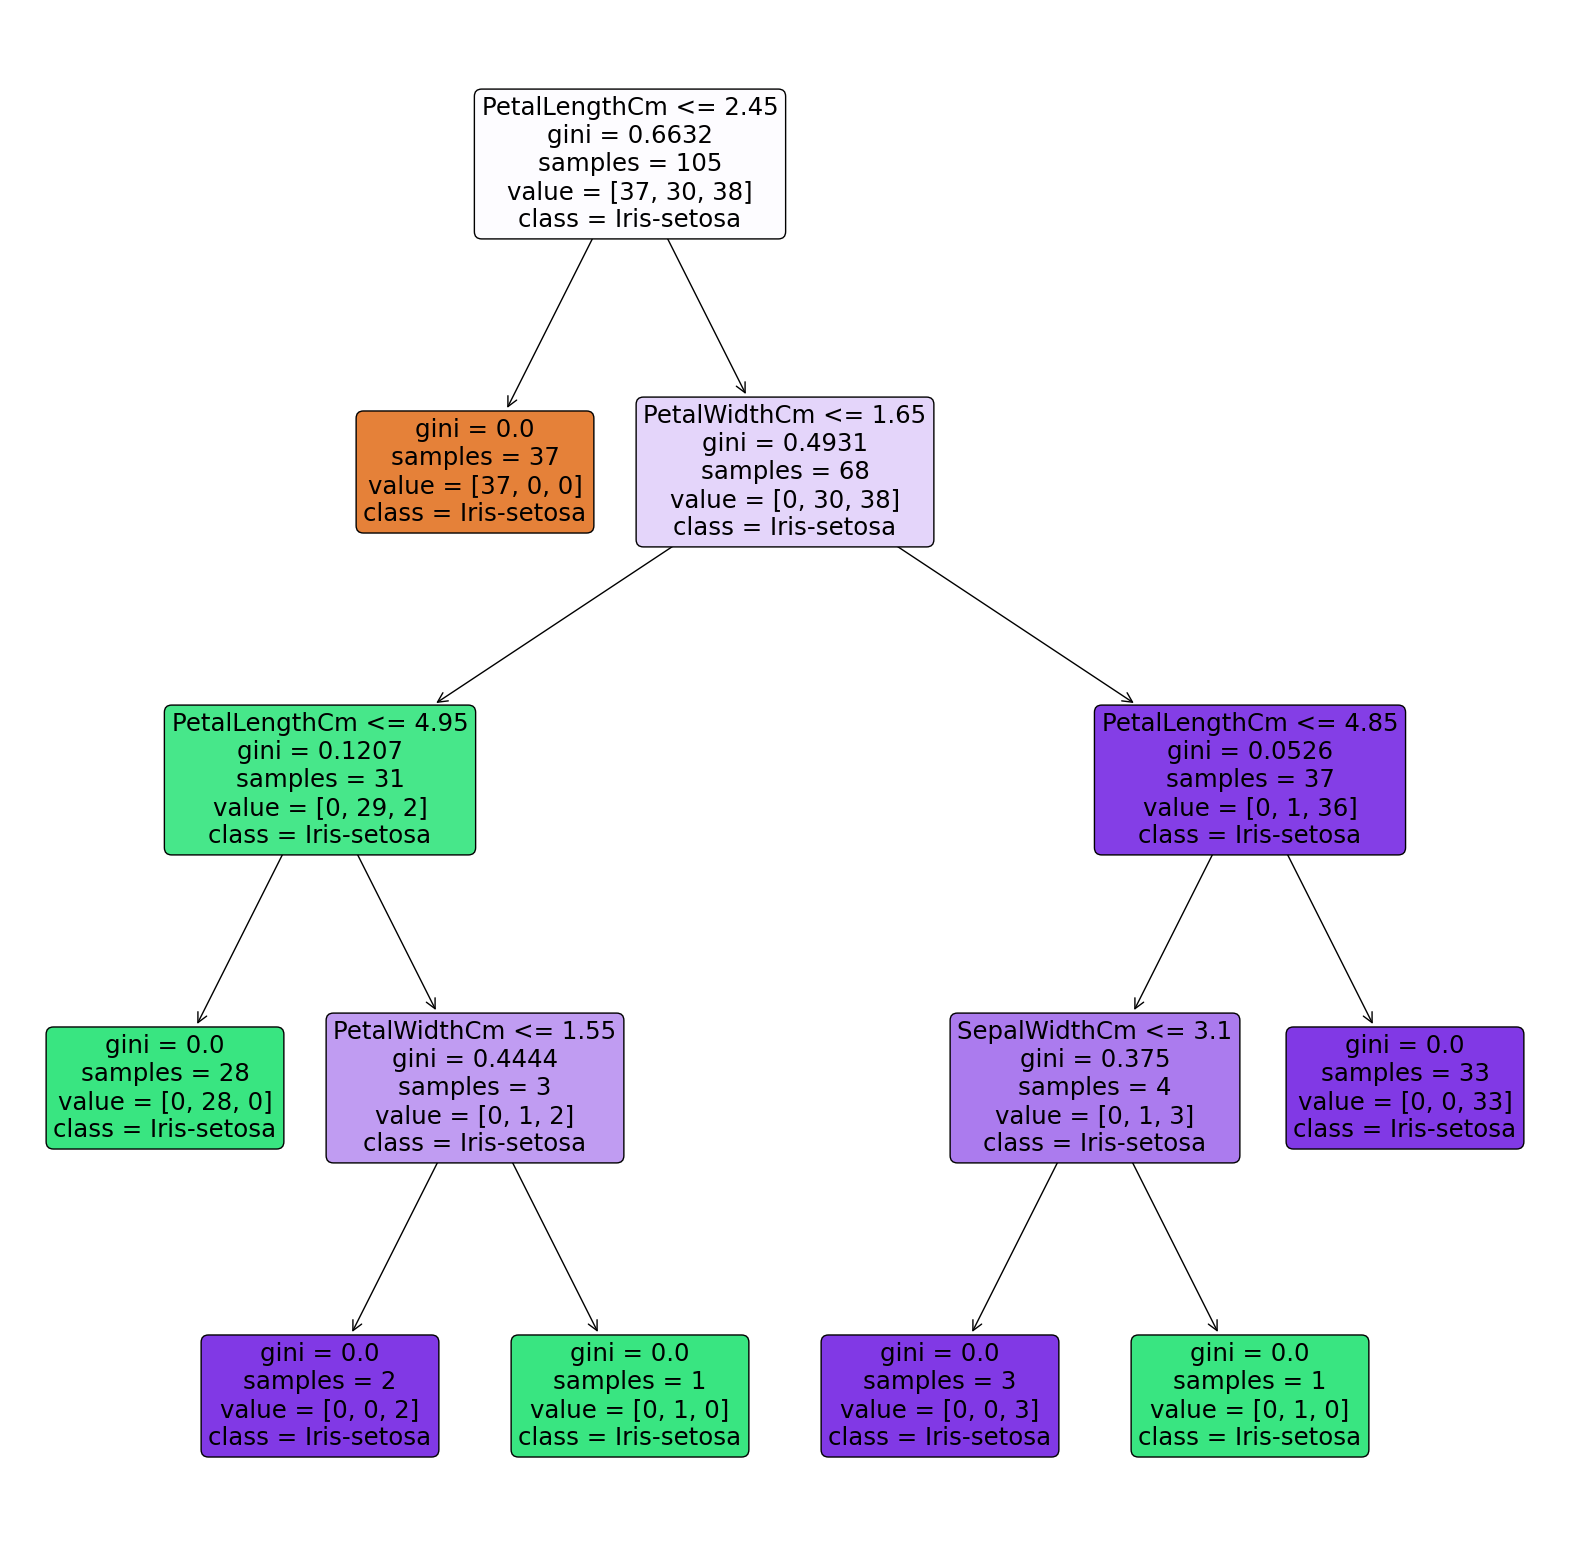

In [ ]:
# Visualising the graph

plt.figure(figsize = (20,20))

dec_tree = plot_tree(dtree, feature_names = data1.columns, 
                     class_names = target.values, filled = True , precision = 4, rounded = True);


# CONCLUSION


I was able to successfully created the Decision Tree classifier and visualized it graphically. And carry-out prediction using

Decision Tree Algorithm and was able to evaluate the model's accuracy score.


# THANK YOU !